<a href="https://colab.research.google.com/github/660510745/229352---Statistical-Learning-for-Data-Science-2/blob/main/Lab07_Boosted_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #6

## Boosted tree models on a simulated dataset

- [AdaBoostClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn-ensemble-adaboostclassifier)
- [XGBClassifier documentation](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier)
- [LGBMClassifier documentation](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm-lgbmclassifier)
- [GridSeachCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)


- [Data](https://github.com/donlapark/ds352-labs/raw/main/Lab06-data.zip)


Perform GridSearchCV of the following three models on the provided training set (`X_train.csv` and `y_train.csv`)

1. Evaluate these models on the test set (`X_test.csv` and `y_test.csv`). **Keep searching (using cross-validation) until you find the model that achieves > 0.83 out-of-fold accuracy (use `GridSeachCV.best_score_` to obtain the out-of-fold accuracy)**

2. Report the test accuracy of your best model.

3. For each model, plot the feature importances

For `AdaBoostClassifier`, feature importances can be obtained by calling the `feature_importances_` attribute after fitting the model.

For `XGBClassifier` and `LGBMClassifier`, feature importances can be obtained using the library’s `plot_importance` function. Here is a minimal example in XGBoost:

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier, plot_importance as xgb_plot_importance
from lightgbm import LGBMClassifier, plot_importance as lgbm_plot_importance
from sklearn.metrics import accuracy_score

In [10]:
from sklearn import datasets


iris = datasets.load_iris()
X = iris.data
y = iris.target

In [11]:
from sklearn.ensemble import AdaBoostClassifier


ab = AdaBoostClassifier()
ab.fit(X, y)
ab.feature_importances_

array([0.        , 0.05832968, 0.40556132, 0.536109  ])

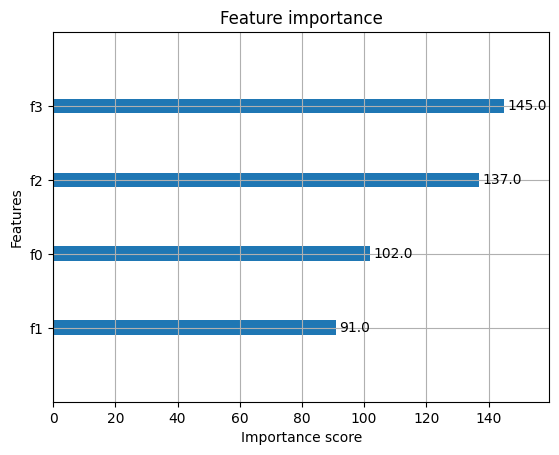

In [12]:
from xgboost import XGBClassifier, plot_importance


model = XGBClassifier()
model.fit(X, y)
plot_importance(model);

In [13]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


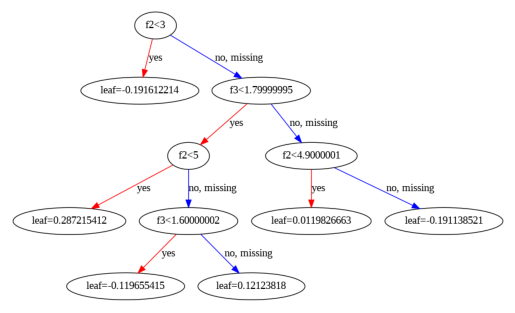

In [14]:
from xgboost import plot_tree

plot_tree(model, num_trees=4);

In [15]:
# Load datasets
X_train = pd.read_csv('X_train.csv', header=None)
y_train = pd.read_csv('y_train.csv', header=None)
X_test = pd.read_csv('X_test.csv', header=None)
y_test = pd.read_csv('y_test.csv', header=None)

# Flatten target labels
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

print(f"Training Shape: {X_train.shape}")
print(f"Testing Shape: {X_test.shape}")


Training Shape: (212, 13)
Testing Shape: (91, 13)


In [16]:
models = {
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME'),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', verbosity=0),
    'LightGBM': LGBMClassifier(verbose=-1)
}

param_grids = {
    'AdaBoost': {
        'n_estimators': [50, 100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.5, 1.0]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.8, 1.0]
    },
    'LightGBM': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'num_leaves': [15, 31, 50],
        'subsample': [0.8, 1.0]
    }
}

In [17]:
best_estimators = {}
results = {}

for name, model in models.items():
    print(f"Searching for {name}...")
    grid = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)

    best_estimators[name] = grid.best_estimator_
    results[name] = grid.best_score_
    print(f"{name} Best CV Score: {grid.best_score_:.4f}")
    print(f"{name} Best Params: {grid.best_params_}")
    print("-" * 30)

# Identify the best model
best_model_name = max(results, key=results.get)
best_cv_score = results[best_model_name]
final_model = best_estimators[best_model_name]

print(f"\nTop Model: {best_model_name} with CV Accuracy: {best_cv_score:.4f}")

if best_cv_score > 0.83:
    print("Success! Out-of-fold accuracy > 0.83 achieved.")
else:
    print("Warning: 0.83 threshold not met. Consider expanding the grid.")

Searching for AdaBoost...


/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoost Best CV Score: 0.8442
AdaBoost Best Params: {'learning_rate': 0.1, 'n_estimators': 50}
------------------------------
Searching for XGBoost...
XGBoost Best CV Score: 0.8348
XGBoost Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 1.0}
------------------------------
Searching for LightGBM...
LightGBM Best CV Score: 0.8158
LightGBM Best Params: {'learning_rate': 0.2, 'n_estimators': 50, 'num_leaves': 15, 'subsample': 0.8}
------------------------------

Top Model: AdaBoost with CV Accuracy: 0.8442
Success! Out-of-fold accuracy > 0.83 achieved.


In [18]:
# Evaluate Test Set
y_pred = final_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Set Accuracy for {best_model_name}: {test_acc:.4f}")

Test Set Accuracy for AdaBoost: 0.8462


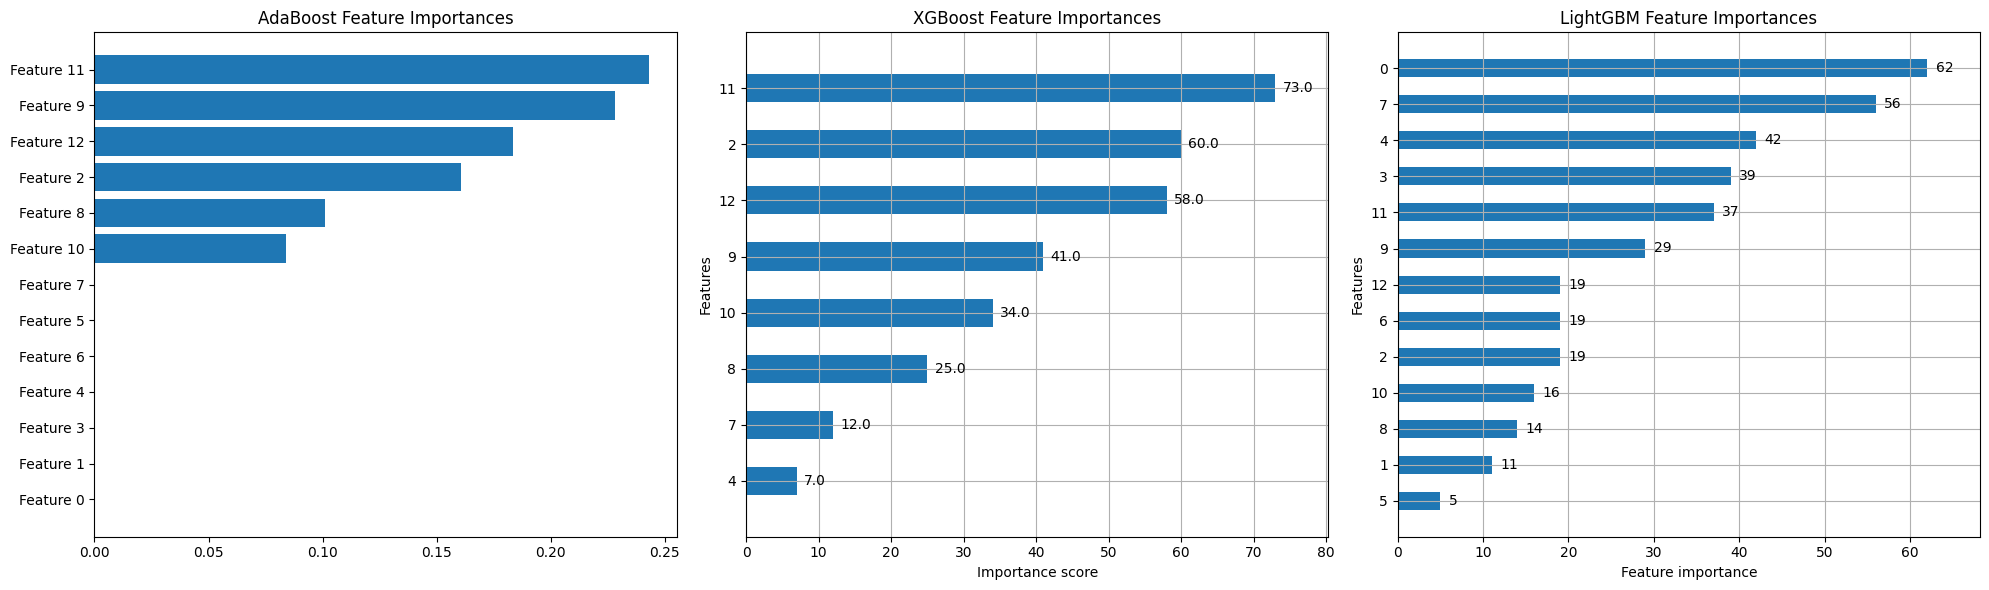

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# 1. AdaBoost
if 'AdaBoost' in best_estimators:
    ada_model = best_estimators['AdaBoost']
    importances = ada_model.feature_importances_
    indices = np.argsort(importances)

    axes[0].set_title("AdaBoost Feature Importances")
    axes[0].barh(range(len(indices)), importances[indices], align='center')
    axes[0].set_yticks(range(len(indices)))
    axes[0].set_yticklabels([f"Feature {i}" for i in indices])

# 2. XGBoost
if 'XGBoost' in best_estimators:
    xgb_model = best_estimators['XGBoost']
    xgb_plot_importance(xgb_model, ax=axes[1], title="XGBoost Feature Importances", height=0.5)

# 3. LightGBM
if 'LightGBM' in best_estimators:
    lgbm_model = best_estimators['LightGBM']
    lgbm_plot_importance(lgbm_model, ax=axes[2], title="LightGBM Feature Importances", height=0.5)

plt.tight_layout()
plt.show()